## Import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
import os
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
import statistics as stat

## Load data and save them into variables

0.391


<Figure size 432x288 with 0 Axes>

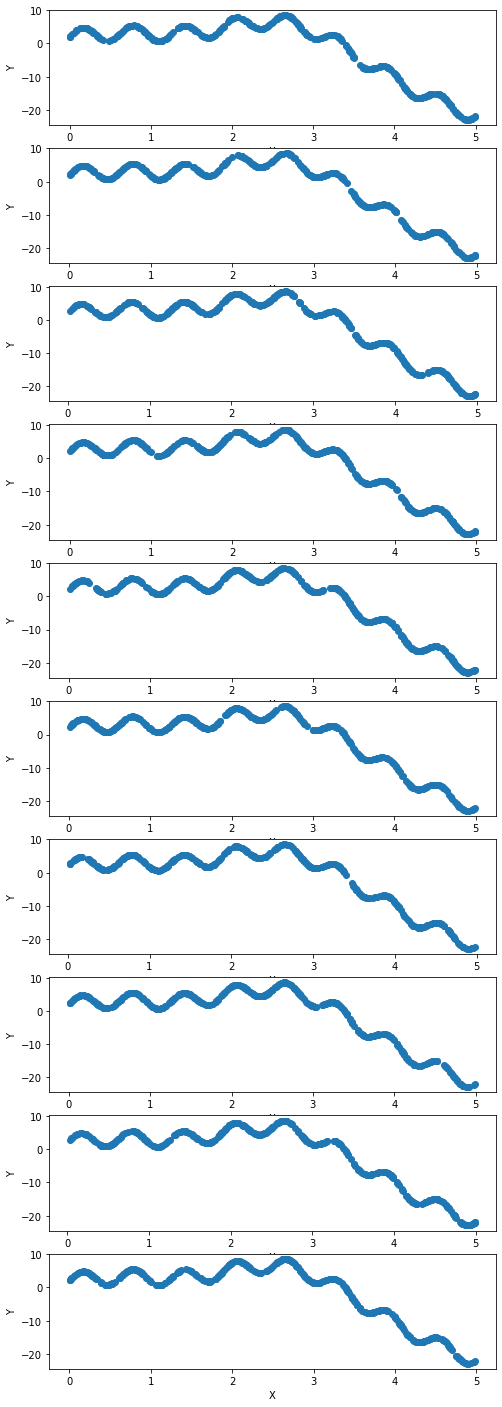

In [2]:
#os.getcwd()
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)


pd.DataFrame(data).to_csv(f"{os.getcwd()}\data.csv")

df = pd.read_csv('data.csv',index_col='Unnamed: 0')

X_train, X_test, y_train, y_test = train_test_split(data[:,0], data[:,1], test_size=0.1, random_state=43)

train_data = np.zeros((len(X_train),2))
pd.DataFrame(train_data).to_csv(f"{os.getcwd()}\\train_data.csv")
df = pd.read_csv('train_data.csv',index_col='Unnamed: 0')

#divid X train into 450*10 train sets

ran =  random.sample(range(4500), 4500)
train_data_divided = np.zeros((10,450,2))
counter = 0
for i in range(train_data_divided.shape[0]):
    for j in range(train_data_divided.shape[1]):
        train_data_divided[i][j][0] = X_train[ran[counter]]
        train_data_divided[i][j][1] = y_train[ran[counter]]
        counter = counter+1

print(train_data_divided[0][0][0])

f = plt.figure()

fig, ax = plt.subplots(10, 1 , figsize=(8, 25))
#plot x_train and y_train
for i in range(train_data_divided.shape[0]):
    ax[i].scatter(x = train_data_divided[i][:,0], y = train_data_divided[i][:,1])
    ax[i].set_xlabel("X")
    ax[i].set_ylabel("Y")

important_values = []    

## train model

In [3]:
def train_model(deg, train_data, x_test, y_test):
    regressor = LinearRegression()
    poly = PolynomialFeatures(degree= deg)
    predicted_values = []
    avg_expected_loss_list = []
    avg_bias_list = []
    avg_var_list = []
    poly_test = poly.fit_transform(x_test.reshape(-1,1))
    for i in range(train_data.shape[0]):
        poly_train = poly.fit_transform(train_data[i][:,0].reshape(-1,1))
        regressor.fit(poly_train,train_data[i][:,1].reshape(-1,1))
        predicted_values.append(regressor.predict(poly_test))
        avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(regressor, poly_train,train_data[i][:,1], poly_test,y_test,loss='mse')
        avg_expected_loss_list.append(avg_expected_loss)
        avg_bias_list.append(avg_bias)
        avg_var_list.append(avg_var)

    print(f"average expected loss = { stat.mean(avg_expected_loss_list)}")
    print(f"average bias = {stat.mean(avg_bias_list)}")
    print(f"average variance = {stat.mean(avg_var_list)}")

    fig, ax = plt.subplots(10, 1 , figsize=(8, 40))
    for i in range(train_data.shape[0]):
        ax[i].scatter(x = x_test, y = predicted_values[i])
        ax[i].scatter(x = x_test, y = y_test)
        ax[i].set_xlabel("X")
        ax[i].set_ylabel("Y")
    return np.array([stat.mean(avg_expected_loss_list),stat.mean(avg_bias_list),stat.mean(avg_var_list)])    

average expected loss = 30.343959781667245
average bias = 30.20185675181247
average variance = 0.14210302985477155
[array([30.34395978, 30.20185675,  0.14210303])]


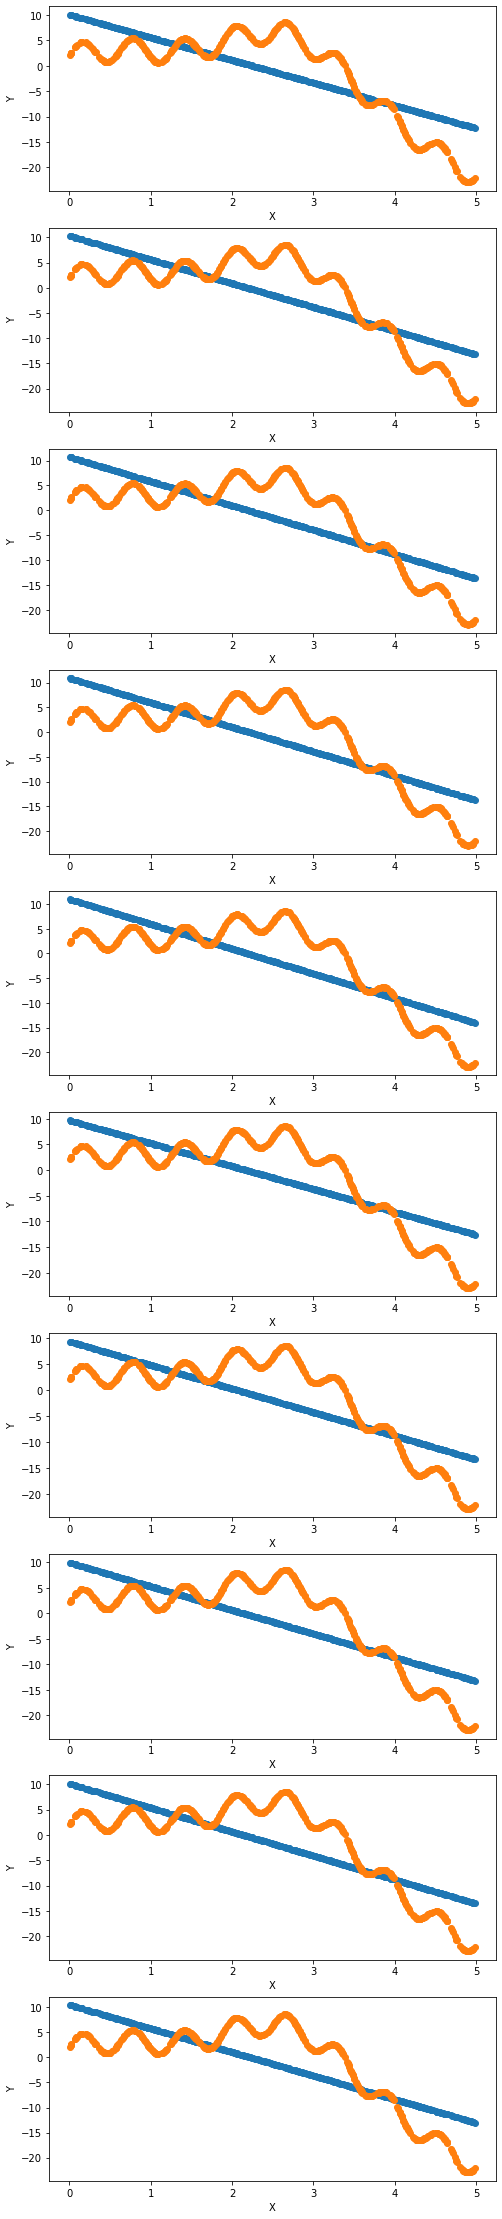

In [4]:
important_values.append(train_model(1,train_data_divided,X_test,y_test))
print(important_values)

average expected loss = 6.348102146229044
average bias = 6.309934667270161
average variance = 0.03816747895888332


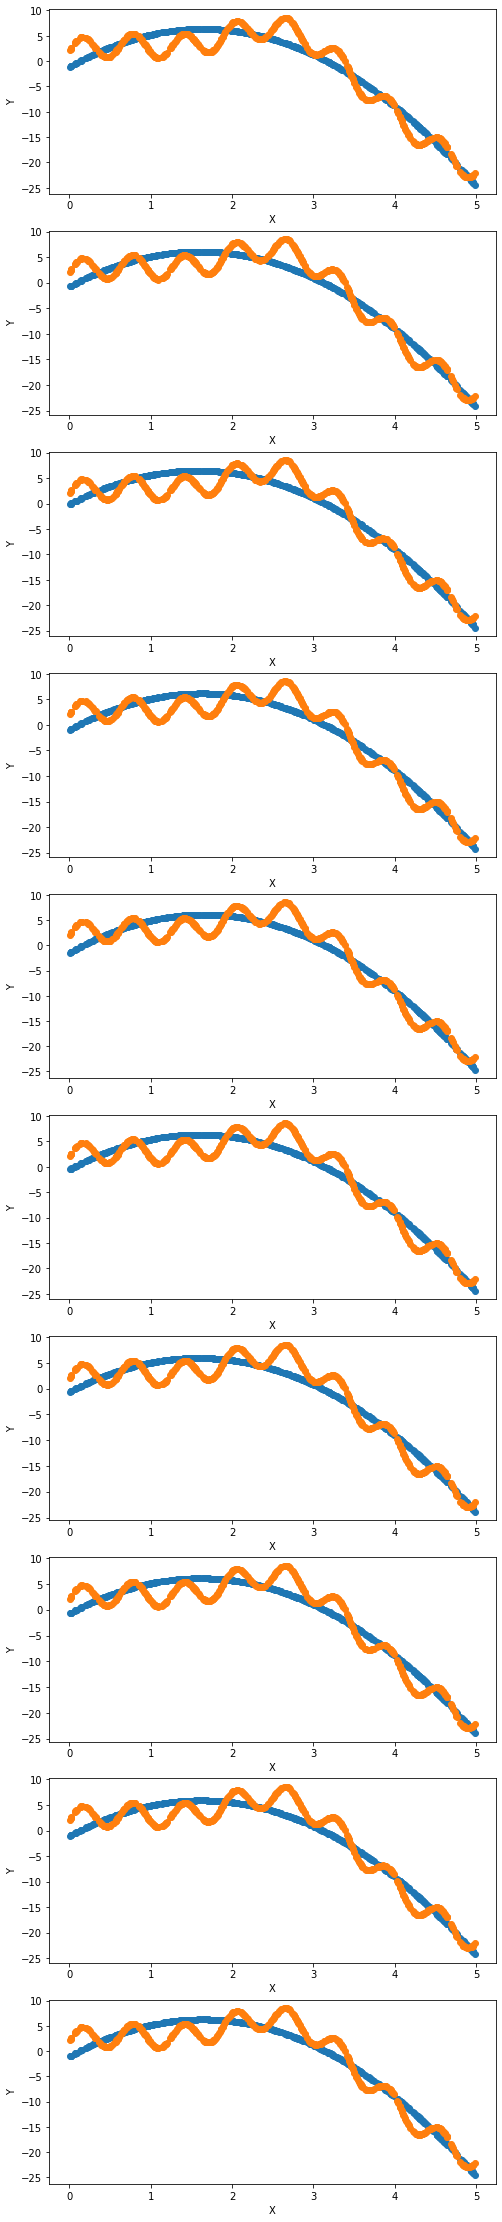

In [5]:
important_values.append(train_model(2,train_data_divided,X_test,y_test))

average expected loss = 5.404266971769468
average bias = 5.3598099225352716
average variance = 0.04445704923419668


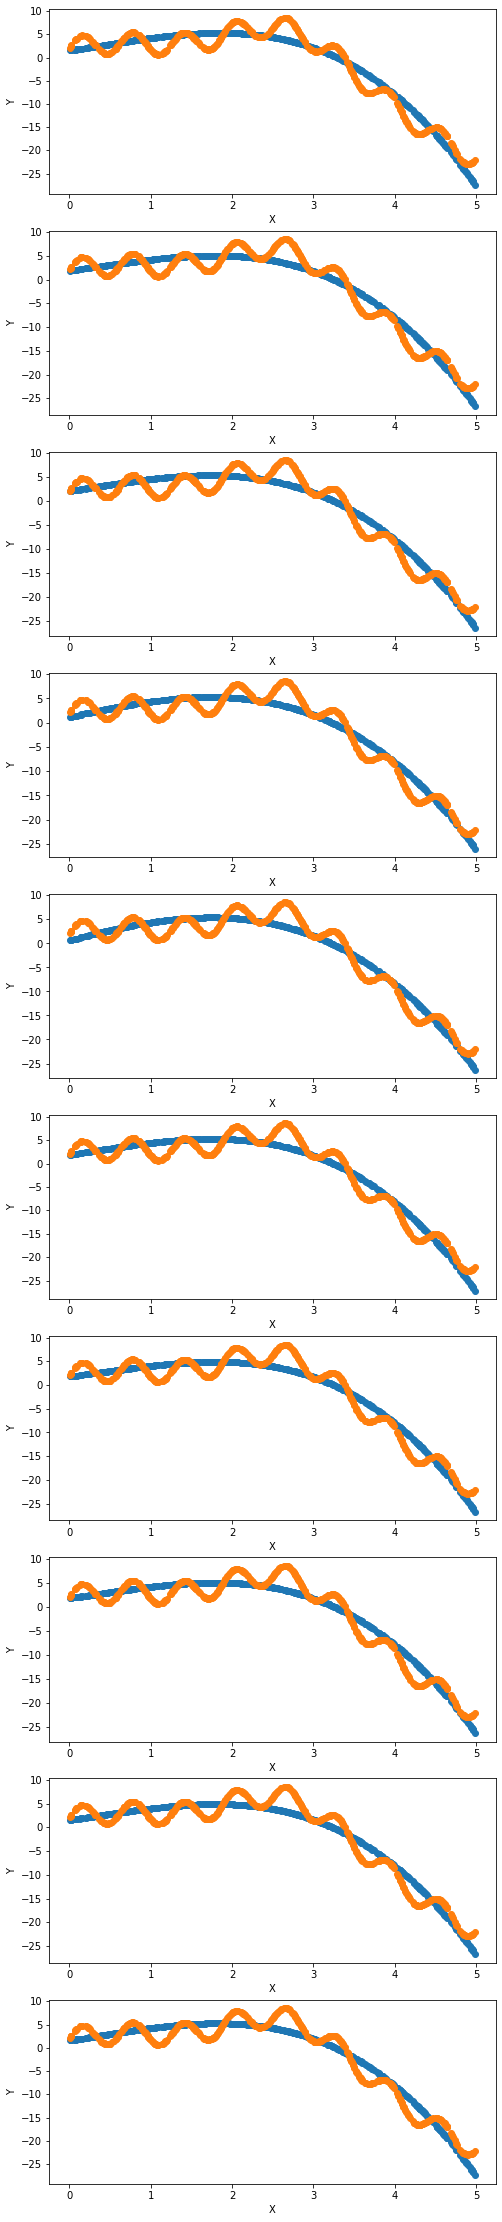

In [6]:
important_values.append(train_model(3,train_data_divided,X_test,y_test))

average expected loss = 3.301880433521286
average bias = 3.2697368123668094
average variance = 0.03214362115447732


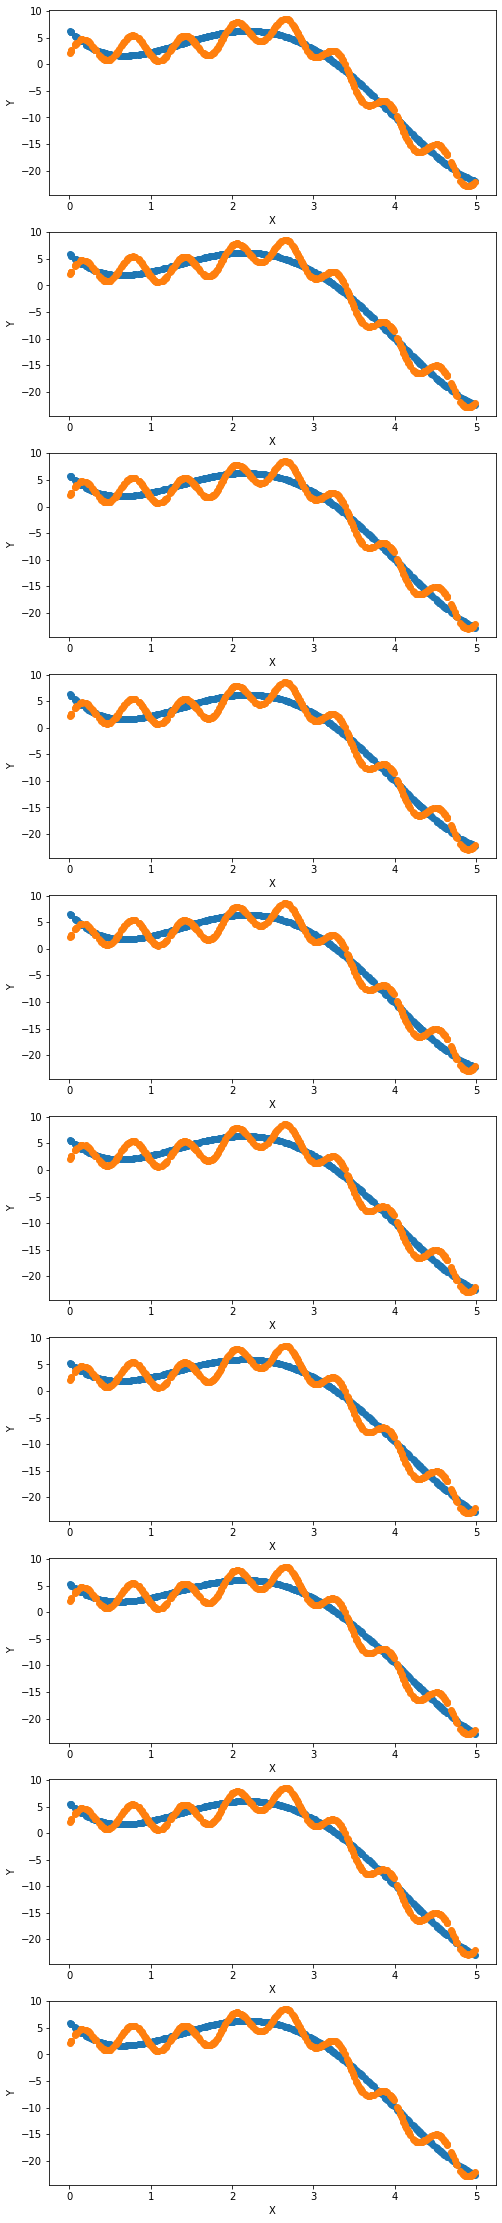

In [7]:
important_values.append(train_model(4,train_data_divided,X_test,y_test))

average expected loss = 3.110338207551567
average bias = 3.0715891828383666
average variance = 0.03874902471320056


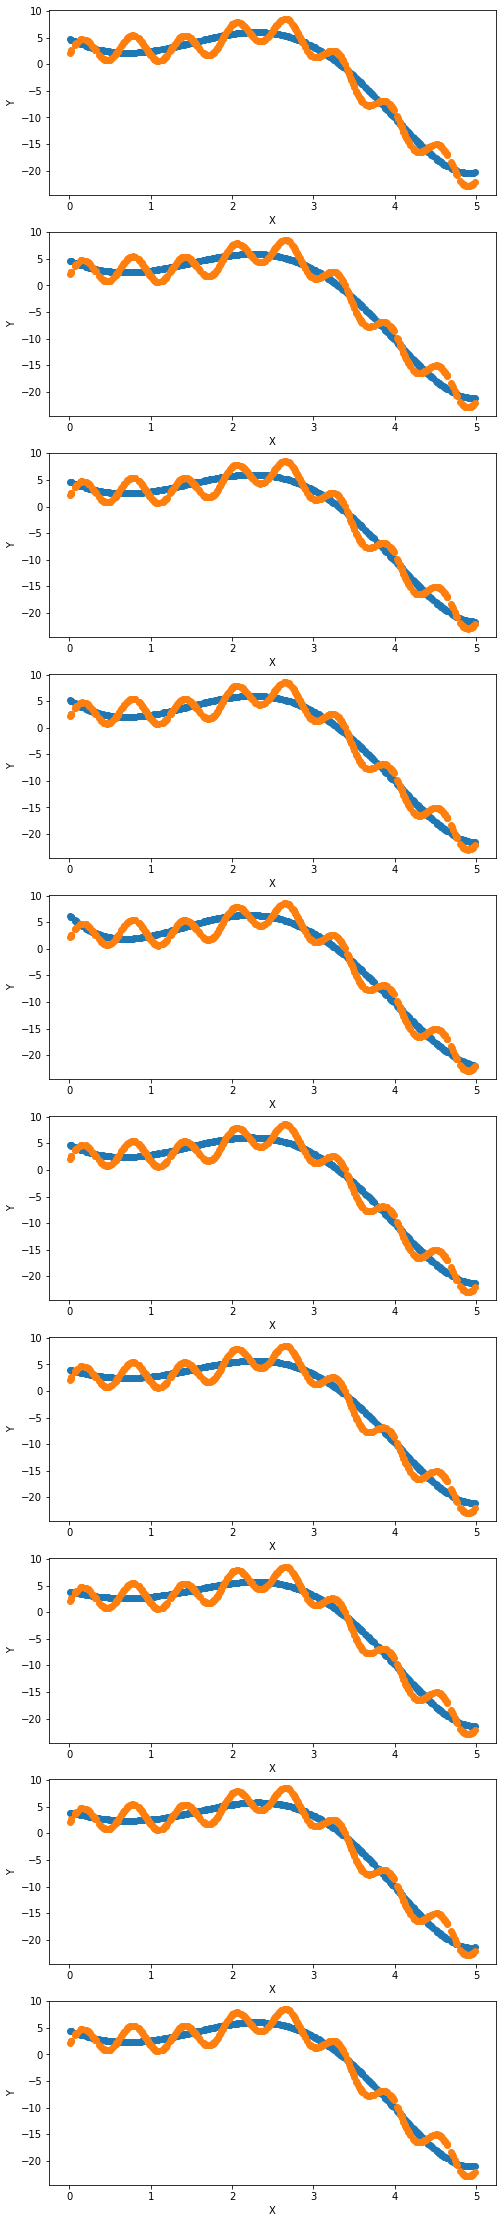

In [8]:
important_values.append(train_model(5,train_data_divided,X_test,y_test))

average expected loss = 2.7469486409864587
average bias = 2.7097118778572895
average variance = 0.0372367631291694


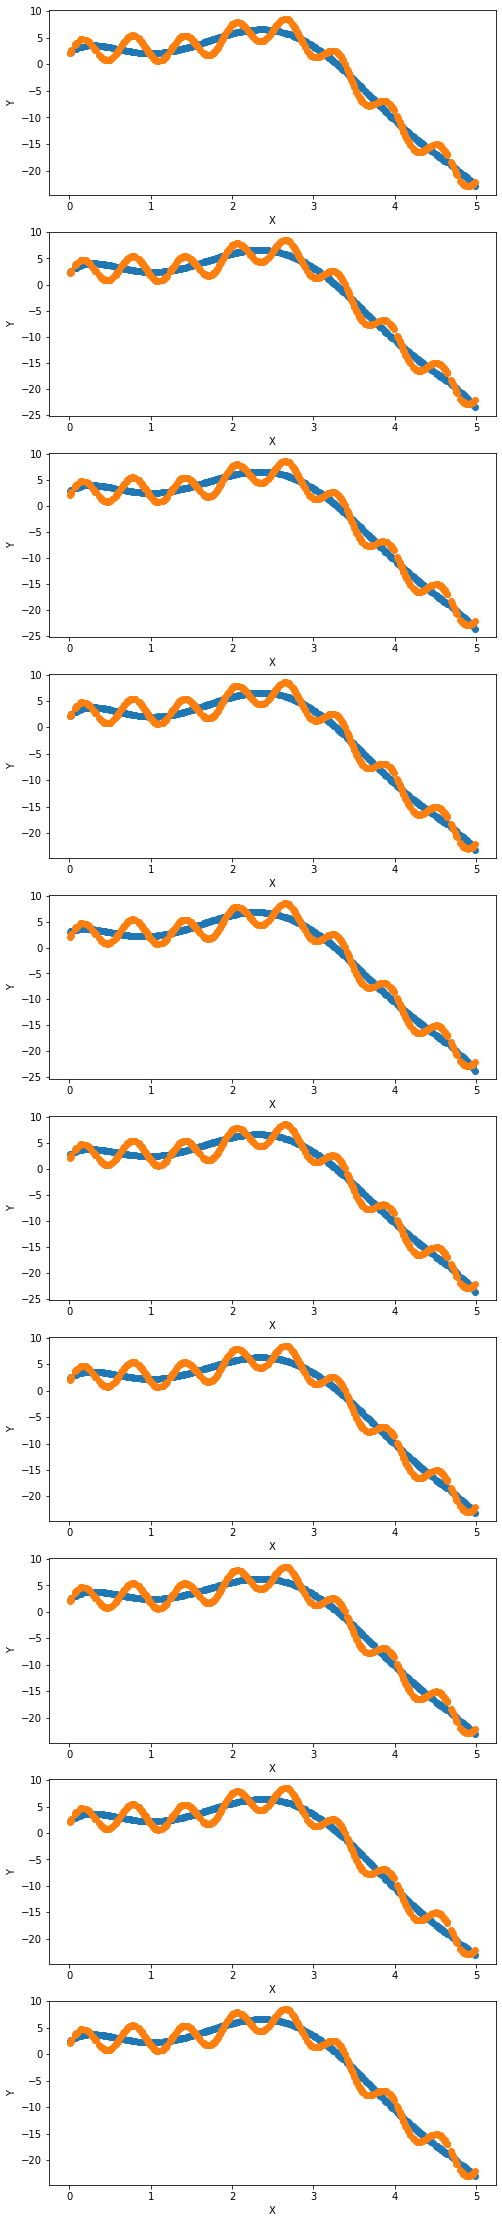

In [9]:
important_values.append(train_model(6,train_data_divided,X_test,y_test))

average expected loss = 2.580636913223105
average bias = 2.5368782169911017
average variance = 0.043758696232002764


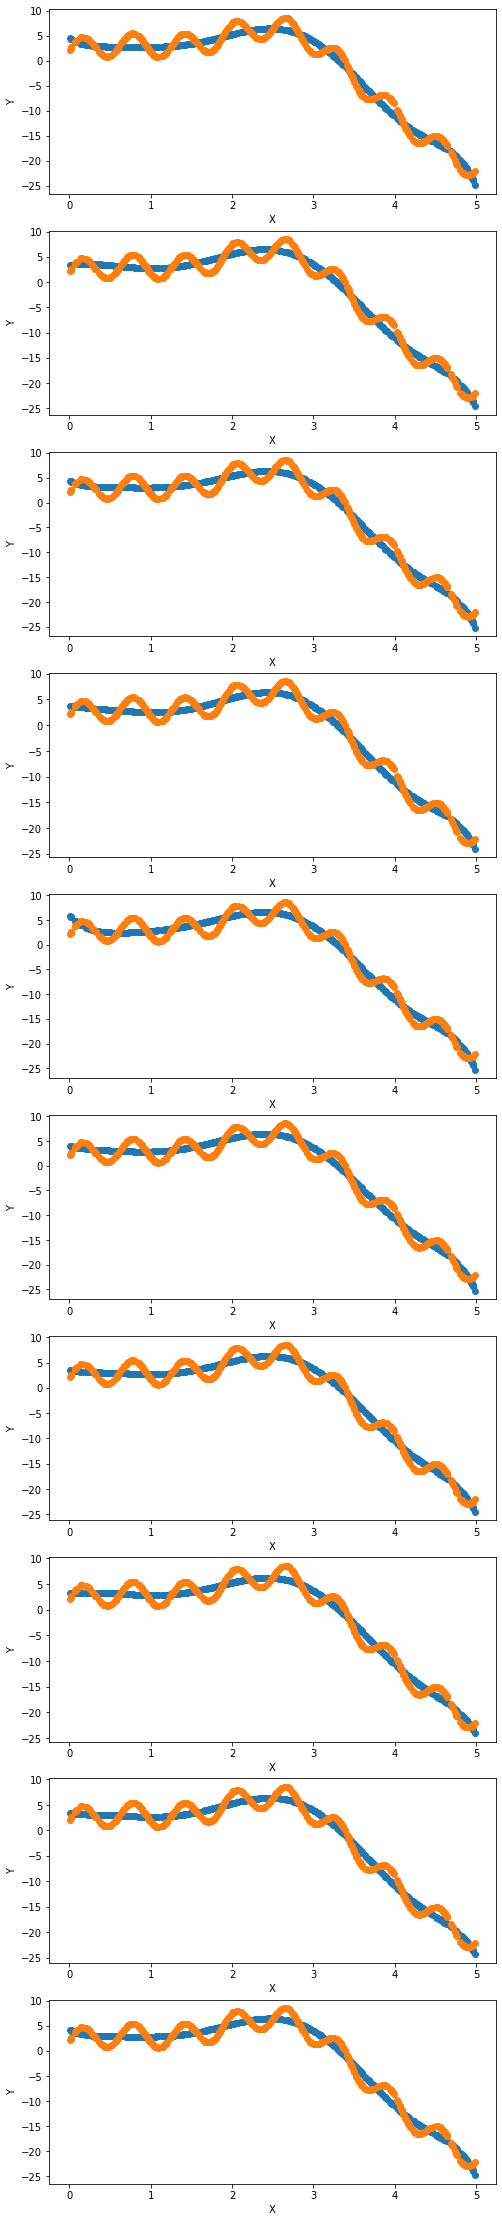

In [10]:
important_values.append(train_model(7,train_data_divided,X_test,y_test))

average expected loss = 2.6035107729850355
average bias = 2.5519722563096408
average variance = 0.05153851667539428


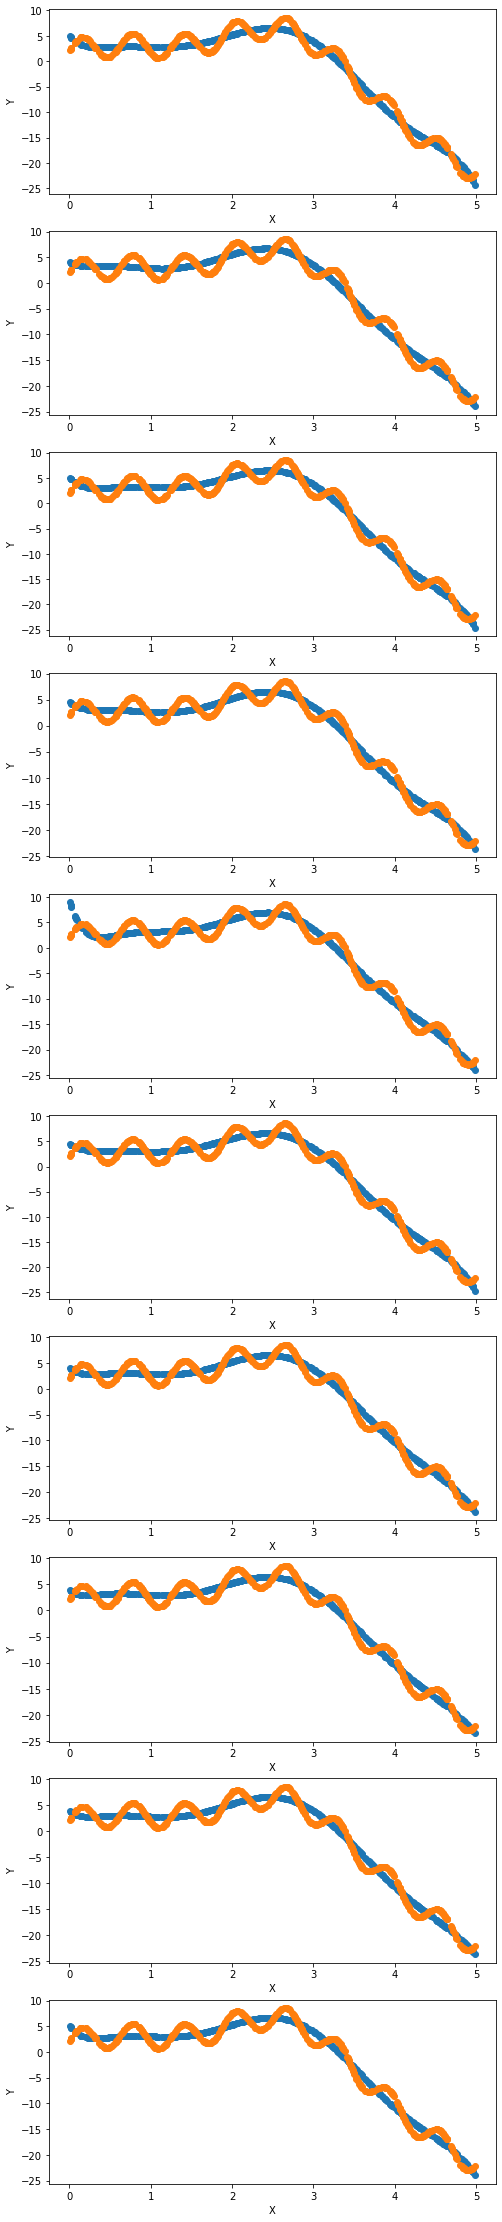

In [11]:
important_values.append(train_model(8,train_data_divided,X_test,y_test))

average expected loss = 2.608357671682087
average bias = 2.5497497155130575
average variance = 0.05860795616903054


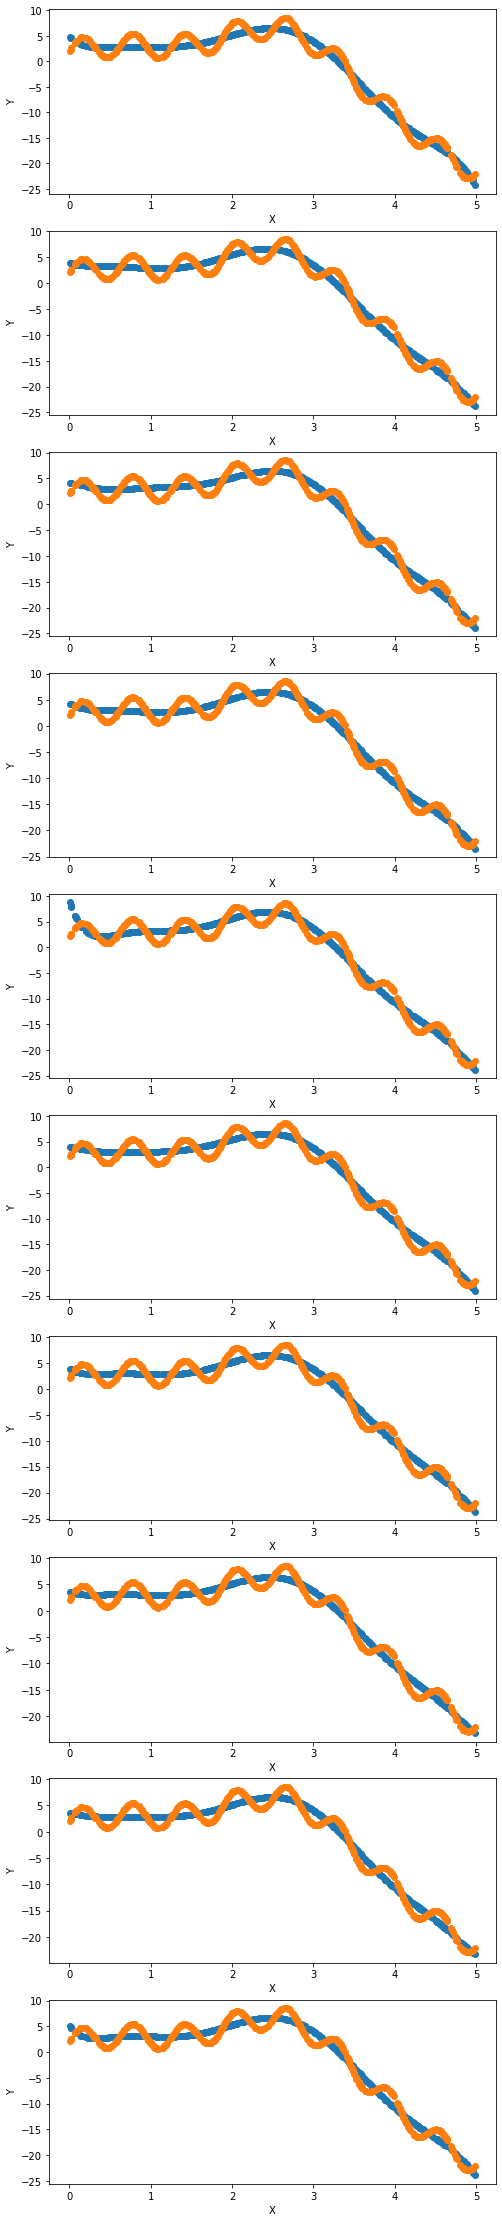

In [12]:
important_values.append(train_model(9,train_data_divided,X_test,y_test))

## plotting MSE, bias and variance

[[30.34395978 30.20185675  0.14210303]
 [ 6.34810215  6.30993467  0.03816748]
 [ 5.40426697  5.35980992  0.04445705]
 [ 3.30188043  3.26973681  0.03214362]
 [ 3.11033821  3.07158918  0.03874902]
 [ 2.74694864  2.70971188  0.03723676]
 [ 2.58063691  2.53687822  0.0437587 ]
 [ 2.60351077  2.55197226  0.05153852]
 [ 2.60835767  2.54974972  0.05860796]]


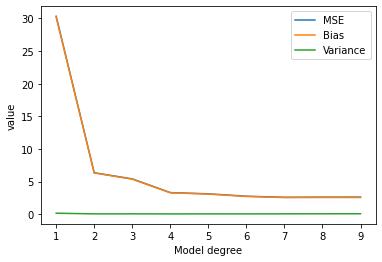

In [13]:
important_values = np.array(important_values)
print(important_values)
plt.plot(np.arange(1,10),important_values[:,0],label="MSE")
plt.plot(np.arange(1,10),important_values[:,1],label="Bias")
plt.plot(np.arange(1,10),important_values[:,2],label="Variance")
plt.xlabel("Model degree")
plt.ylabel("value")
plt.legend()